#Código Vigas PEII
##### Andrés Felipe Contreras, Melany Daza, Katherin Nohava

In [1]:
#!pip install sv-ttk
#!pip install matplotlib
#!pip install sympy
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sp
import tkinter as tk
from Funciones import *
from tkinter import ttk
import sv_ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg as plot_widget


###Interface

1.0 -100.0


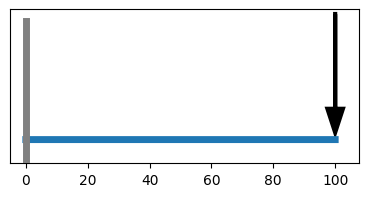

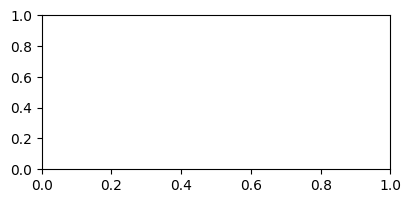

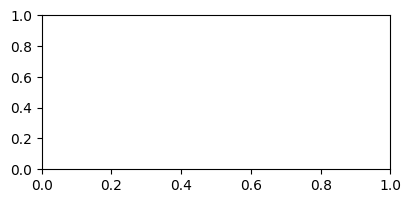

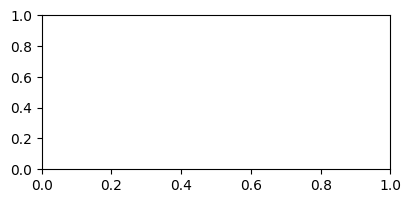

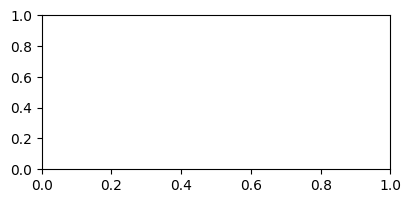

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\andre\AppData\Local\Temp\ipykernel_21580\3657938953.py", line 157, in <lambda>
    calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph,figbeam,sheargraph,figshear,momentgraph,
                                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\iCloudDrive\Uni\Tercero\Proyecto\Codigo_vigas\Funciones.py", line 301, in calculate_beam
    plot_slope(slopegraph,figslope)
  File "c:\Users\andre\iCloudDrive\Uni\Tercero\Proyecto\Codigo_vigas\Funciones.py", line 248, in plot_slope
    beam[6][0] = beam[5][0]/(E*I)
                             ^
NameError: name 'E' is not defined


In [2]:
ui = tk.Tk()
ui.title("Análisis de vigas")
ui.geometry("1600x850")
sv_ttk.set_theme("dark")

vcmd = (ui.register(validate_numeric_input), '%d', '%P')
vcmd2 = (ui.register(validate_numeric_input_more_decimals), '%d', '%P')

#grid

for i in range(0, 1600, 50):
    grid = ttk.Label(ui, text="|"+str(i), font=("Arial", 8))
    grid.place(x=i, y=0)

#Inputs

title1 = ttk.Label(ui, text="Introduzca datos de la viga", font=("Arial", 16))
title1.place(x=50, y=20)   

#Tamaño

title_tamaño = ttk.Label(ui, text="Tamaño de la viga (m)", font=("Arial", 12))
title_tamaño.place(x=10, y=60)  

tam = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd) 
tam.place(x=10, y=80)

tambutton = ttk.Button(ui, text="Aceptar", command=lambda: update_build(tam, valor_tamaño))
tambutton.place(x=100, y=80)

#Tipo

title_tipo = ttk.Label(ui, text="Tipo de viga", font=("Arial", 12))
title_tipo.place(x=10, y=120)

elegir_tipo = ttk.Combobox(ui, width=4, values=["Cantilever", "Apoyada"])
elegir_tipo.place(x=10, y=140)

tipobutton = ttk.Button(ui, text="Aceptar", command=lambda: update_disable(elegir_tipo, valor_tipo,elegir_tipo,apoyo1,apoyo2,apo1button,apo2button))
tipobutton.place(x=100, y=140)

#Apoyos

title_apoyos = ttk.Label(ui, text="Posición de los apoyos", font=("Arial", 12))
title_apoyos.place(x=10, y=180)

text_apoyo1 = ttk.Label(ui, text="Apoyo 1", font=("Arial", 10))
text_apoyo1.place(x=30, y=200)

apoyo1 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo1.place(x=10, y=220)

apo1button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo1, valor_apoyo1,1))
apo1button.place(x=100, y=220)

text_apoyo2 = ttk.Label(ui, text="Apoyo 2", font=("Arial", 10))
text_apoyo2.place(x=30, y=260)

apoyo2 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo2.place(x=10, y=280)

apo2button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo2, valor_apoyo2,2))
apo2button.place(x=100, y=280)

#Cargas puntuales

title_cargas = ttk.Label(ui, text="Cargas puntuales", font=("Arial", 12))
title_cargas.place(x=10, y=320)

text_poscarga = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_poscarga.place(x=30, y=340)

cargapuntualpos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
cargapuntualpos.place(x=10, y=360)

text_magnitud = ttk.Label(ui, text="Magnitud (N)", font=("Arial", 10))
text_magnitud.place(x=115, y=340)

cargapuntualmag = ttk.Entry(ui, width=8, textvariable=tk.IntVar())
cargapuntualmag.place(x=100, y=360)

tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_load(cargapuntualpos, cargapuntualmag))
tipobutton.place(x=190, y=360)

#Momentos puntuales

title_momentos = ttk.Label(ui, text="Momentos puntuales", font=("Arial", 12))
title_momentos.place(x=10, y=400)

text_posmomento = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_posmomento.place(x=30, y=420)

momentopos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentopos.place(x=10, y=440)

text_magnitud = ttk.Label(ui, text="Magnitud (Nm)", font=("Arial", 10))
text_magnitud.place(x=115, y=420)

momentomag = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentomag.place(x=100, y=440)

tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_moment(momentopos, momentomag))
tipobutton.place(x=190, y=440)

#Cargas distribuidas

title_distribuidas = ttk.Label(ui, text="Cargas distribuidas", font=("Arial", 12))
title_distribuidas.place(x=10, y=480)

text_expression = ttk.Label(ui, text="Expresión matématica (en terminos de x)", font=("Arial", 10))
text_expression.place(x=30, y=500)

load_expression = ttk.Entry(ui, width=30, textvariable=tk.IntVar())
load_expression.place(x=10, y=520)

text_pos_ini = ttk.Label(ui, text="Inicio (m)", font=("Arial", 10))
text_pos_ini.place(x=30, y=560)

dist_ini = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
dist_ini.place(x=10, y=580)

text_pos_fin = ttk.Label(ui, text="Fin (m)", font=("Arial", 10))
text_pos_fin.place(x=115, y=560)

dist_fin = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
dist_fin.place(x=100, y=580)

distbutton = ttk.Button(ui, text="Agregar", command=lambda: distributed_load(dist_ini, dist_fin, load_expression))
distbutton.place(x=190, y=580)

# Módulo de Young

title_material = ttk.Label(ui, text="Propiedades de la viga", font=("Arial", 12))
title_material.place(x=10, y=620)

text_youngs_modulus = ttk.Label(ui, text="Módulo de Young (Pa)", font=("Arial", 10))
text_youngs_modulus.place(x=30, y=640)

youngs_modulus = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
youngs_modulus.place(x=10, y=660)

youngs_modulus_button = ttk.Button(ui, text="Agregar", command=lambda: add_youngs_modulus(youngs_modulus))
youngs_modulus_button.place(x=190, y=660)

# Momento de inercia
text_moment_of_inertia = ttk.Label(ui, text="Momento de Inercia (m^4)", font=("Arial", 10))
text_moment_of_inertia.place(x=30, y=700)

moment_of_inertia = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
moment_of_inertia.place(x=10, y=720)

moment_of_inertia_button = ttk.Button(ui, text="Agregar", command=lambda: add_inertia(moment_of_inertia))
moment_of_inertia_button.place(x=190, y=720)

#Calcular 

calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph,figbeam,sheargraph,figshear,momentgraph,
figmoment,slopegraph,figslope,deflectiongraph,figdeflection))
calcular.place(x=10, y=800)


#Datos

tamaño = ttk.Label(ui, text= "Longitud (m): ", font=("Arial", 12))
tamaño.place(x=500, y=40)

valor_tamaño = ttk.Label(ui, text= "", font=("Arial", 12))
valor_tamaño.place(x=600, y=40)

tipo = ttk.Label(ui, text= "Tipo de viga: ", font=("Arial", 12))
tipo.place(x=500, y=60)

valor_tipo = ttk.Label(ui, text= "", font=("Arial", 12))
valor_tipo.place(x=600, y=60)

pos_apoyo1 = ttk.Label(ui, text= "Apoyo 1: ", font=("Arial", 12))
pos_apoyo1.place(x=500, y=80)

valor_apoyo1 = ttk.Label(ui, text= "", font=("Arial", 12))
valor_apoyo1.place(x=600, y=80)

pos_apoyo2 = ttk.Label(ui, text= "Apoyo 2: ", font=("Arial", 12))
pos_apoyo2.place(x=500, y=100)

valor_apoyo2 = ttk.Label(ui, text= "", font=("Arial", 12))
valor_apoyo2.place(x=600, y=100)

#Gráficas

#Dibujo

figbeam, ax = plt.subplots(figsize=(4.5, 2))

beamgraph = plot_widget(figbeam, master=ui)
beamgraph.get_tk_widget().place(x=850, y=20)

#Cortantes

figshear, ax = plt.subplots(figsize=(4.5, 2))

sheargraph = plot_widget(figshear, master=ui)
sheargraph.get_tk_widget().place(x=600, y=300)

#Momentos

figmoment, ax = plt.subplots(figsize=(4.5, 2))

momentgraph = plot_widget(figmoment, master=ui)
momentgraph.get_tk_widget().place(x=600, y=580)

#Pendientes

figslope, ax = plt.subplots(figsize=(4.5, 2))

slopegraph = plot_widget(figslope, master=ui)
slopegraph.get_tk_widget().place(x=1100, y=300)

#Deflexiones

figdeflection, ax = plt.subplots(figsize=(4.5, 2))

deflectiongraph = plot_widget(figdeflection, master=ui)
deflectiongraph.get_tk_widget().place(x=1100, y=580)

#Reset

entries = [tam, elegir_tipo, apoyo1, apoyo2, cargapuntualpos, cargapuntualmag, momentopos,
 momentomag, load_expression, dist_ini, dist_fin, youngs_modulus, moment_of_inertia]
figures = [figbeam, figshear, figmoment, figslope, figdeflection]
reset = ttk.Button(ui, text="Reset", command=lambda: reset_all(entries,figures))
reset.place(x=100, y=800)

ui.mainloop()
